# Tabular example

In [0]:
from fastai.tabular import *  # Quick accesss to tabular functionality

In [0]:
df = pd.read_csv("training.csv",encoding='utf-8' ) 
sample= pd.read_csv("sample_submission.csv",encoding='utf-8' )
testing=pd.read_csv("test.csv",encoding='utf-8') 


In [0]:
# function import
from fastai.utils.mem import *

In [29]:
path=Path()
df.head()
# sample.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [0]:
dep_var = 'Severity'
cont_names = ['Safety_Score','Days_Since_Inspection','Total_Safety_Complaints','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Accident_Type_Code','Max_Elevation','Violations','Adverse_Weather_Metric',]
# cont_names = ['', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(),path=path,cat_names=[], cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=[],cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [8]:
data.show_batch(rows=10)

Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,target
0.3489,0.3005,0.2102,-1.2577,1.5051,-0.7515,-0.4283,1.4182,0.9497,-0.0790,Highly_Fatal_And_Damaging
1.1206,0.3005,2.3723,0.5632,-0.3673,1.9670,1.6744,-0.0668,0.9497,-0.6640,Significant_Damage_And_Fatalities
-0.1910,-0.8286,-0.6546,-1.2999,-0.1087,-0.6103,1.6744,-0.6345,0.9497,-0.6652,Significant_Damage_And_Fatalities
0.4676,0.3005,-0.3664,0.3830,-0.2484,-0.0601,-1.4797,0.0613,-0.9703,2.4427,Minor_Damage_And_Injuries
-1.1267,1.4295,1.2192,-0.3415,1.4486,-0.5053,1.1487,1.1911,2.8698,-0.6436,Significant_Damage_And_Serious_Injuries
0.4280,0.3005,1.5075,0.0303,0.6551,-0.4040,-0.9540,0.0484,-0.0103,0.4839,Minor_Damage_And_Injuries
-0.0525,0.0182,2.0840,0.2527,-1.3897,0.2331,-0.4283,0.0414,1.9098,-0.2498,Significant_Damage_And_Serious_Injuries
-0.3097,0.3005,0.9309,0.6092,0.9255,1.3697,-1.4797,0.0968,2.8698,2.4969,Significant_Damage_And_Serious_Injuries
1.3524,-0.8286,-0.9429,-0.3300,-0.4386,-0.8818,-0.9540,0.8888,-1.9304,0.7663,Minor_Damage_And_Injuries
-0.6885,1.7118,-0.7988,-0.6137,0.4976,-0.4836,0.6230,0.2538,-0.9703,-0.6110,Minor_Damage_And_Injuries


In [194]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [28]:

learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.model_dir=path
learn.fit(8,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.355847,0.190365,0.965000,00:01
1,0.330916,0.189959,0.955000,00:01
2,0.312483,0.238171,0.950000,00:01
3,0.310586,0.188095,0.965000,00:01
4,0.295056,0.151068,0.960000,00:01
5,0.276964,0.161533,0.965000,00:01
6,0.280210,0.131960,0.965000,00:01
7,0.260096,0.152259,0.945000,00:01


In [0]:
learn.unfreeze()

In [31]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


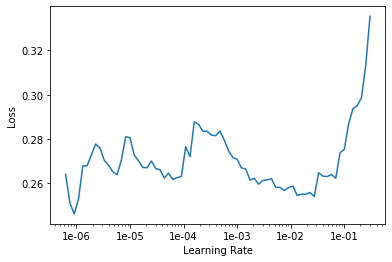

In [32]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(4,max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.258695,0.155296,0.955000,00:01
1,0.245688,0.124789,0.965000,00:01
2,0.240068,0.103920,0.975000,00:01
3,0.221328,0.108648,0.975000,00:01


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');
learn.export()

In [0]:
learn=load_learner(path)

In [18]:
learn.lr_find()

ZeroDivisionError: ignored

In [38]:
ids=pd.Series(testing.iloc[:,10])
ids

0           1
1          10
2          14
3          17
4          21
        ...  
2495    12484
2496    12487
2497    12488
2498    12491
2499    12493
Name: Accident_ID, Length: 2500, dtype: int64

In [0]:
data_pred=[]

In [0]:
for i in range(0,2500):
   row = testing.iloc[i]
   ans=learn.predict(row)[0]
  #  thisans=pd.Series(ans.obj)
   data_pred.append(ans.obj)

In [41]:
data_pred
pred=pd.Series(data_pred)
pred

0                     Highly_Fatal_And_Damaging
1             Significant_Damage_And_Fatalities
2       Significant_Damage_And_Serious_Injuries
3                     Highly_Fatal_And_Damaging
4             Significant_Damage_And_Fatalities
                         ...                   
2495                  Highly_Fatal_And_Damaging
2496    Significant_Damage_And_Serious_Injuries
2497    Significant_Damage_And_Serious_Injuries
2498    Significant_Damage_And_Serious_Injuries
2499                  Highly_Fatal_And_Damaging
Length: 2500, dtype: object

In [0]:
predicted= pd.DataFrame({ 'ID':ids, 'Severity':pred })

In [43]:
predicted.head()

,ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities


In [0]:
predicted.to_csv('ans.csv')
from google.colab import files

files.download('ans.csv')


In [0]:
x=ans.obj

In [0]:
x+"yes"

'Highly_Fatal_And_Damagingyes'